In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
import pandas as pd

In [16]:
df = pd.read_csv(r'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv', error_bad_lines = False, parse_dates = True, index_col = ['date'])

In [17]:
df.head()

,iso_code,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
date,,,,,,,,,,,,,,,,,,,,,
2020-03-13,ABW,Aruba,2,2,0,0,18.733,18.733,0.0,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2020-03-20,ABW,Aruba,4,2,0,0,37.465,18.733,0.0,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2020-03-24,ABW,Aruba,12,8,0,0,112.395,74.930,0.0,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2020-03-25,ABW,Aruba,17,5,0,0,159.227,46.831,0.0,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2020-03-26,ABW,Aruba,19,2,0,0,177.959,18.733,0.0,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [18]:
death = df.loc[df['location']=='India',['new_deaths']]

death = df.loc[df['Country/Region']=='India',['Deaths']]

In [19]:
death.describe()

,new_deaths
count,147.000000
mean,28.346939
std,46.796361
min,0.000000
25%,0.000000
50%,0.000000
75%,39.000000
max,195.000000


In [20]:
death.tail()

,new_deaths
date,
2020-05-22,148
2020-05-23,137
2020-05-24,147
2020-05-25,154
2020-05-26,146


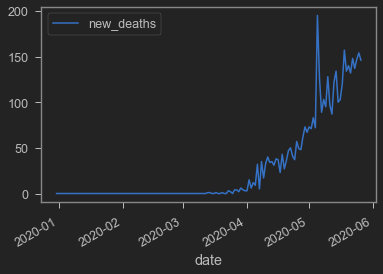

In [21]:
death.plot()

In [22]:
death.head()

,new_deaths
date,
2019-12-31,0
2020-01-01,0
2020-01-02,0
2020-01-03,0
2020-01-04,0


In [23]:
death.shape

(147, 1)

In [24]:
length = 14
batch_size = 1

In [25]:
train = death.iloc[:len(death)-length,:]

In [26]:
test = death.iloc[len(death)-length:,:]

In [27]:
test.shape

(14, 1)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
mmx = MinMaxScaler()

In [31]:
mmx.fit(train)
trainScaled = mmx.transform(train)
testScaled = mmx.transform(test)

In [32]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [33]:
genTrain = TimeseriesGenerator(data = trainScaled, targets = trainScaled, length = 7, batch_size = batch_size)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [35]:
model = Sequential()
model.add(LSTM(units = 200, activation = 'relu', input_shape = (7,trainScaled.shape[1])))
#model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = trainScaled.shape[1]))
model.compile(optimizer = 'adam' , loss = 'mse' )

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [37]:
valGen = TimeseriesGenerator(data = testScaled, targets = testScaled, length = 7, batch_size = batch_size)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
earlyStop = EarlyStopping(patience = 3, verbose = 1)

In [40]:
model.fit_generator(genTrain, epochs = 10, validation_data = valGen )

Epoch 1/10
126/126 [==============================] - 3s 24ms/step - loss: 0.0089 - val_loss: 0.0189
Epoch 2/10
126/126 [==============================] - 3s 22ms/step - loss: 0.0051 - val_loss: 0.0864 ETA
Epoch 3/10
126/126 [==============================] - 3s 23ms/step - loss: 0.0059 - val_loss: 0.0095ETA: 0s - lo
Epoch 4/10
126/126 [==============================] - 3s 22ms/step - loss: 0.0048 - val_loss: 0.04420s - loss: 0.00
Epoch 5/10
126/126 [==============================] - ETA: 0s - loss: 0.0059- - 3s 21ms/step - loss: 0.0058 - val_loss: 0.0069
Epoch 6/10
126/126 [==============================] - 3s 25ms/step - loss: 0.0054 - val_loss: 0.0272l
Epoch 7/10
126/126 [==============================] - 4s 29ms/step - loss: 0.0050 - val_loss: 0.0146 ETA:  - ETA:  - ETA: 0s - l
Epoch 8/10
126/126 [==============================] - 3s 27ms/step - loss: 0.0041 - val_loss: 0.0079
Epoch 9/10
126/126 [==============================] - 3s 27ms/step - loss: 0.0055 - val_loss: 0.0339loss: 

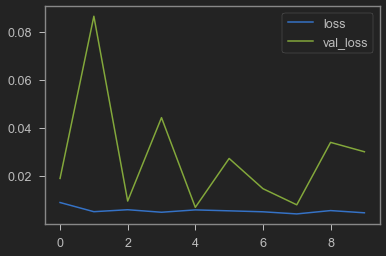

In [41]:
(pd.DataFrame(model.history.history)).plot()

In [42]:
testPred = []
firstEvalBatch = trainScaled[-7:]
currentBatch = firstEvalBatch.reshape((1,7,trainScaled.shape[1]))
for i in range(len(test)):
    currentPred = model.predict(currentBatch)[0]
    testPred.append(currentPred)
    currentBatch = np.append(currentBatch[:,1:,:], [[currentPred]], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
testPred = mmx.inverse_transform(testPred)

In [44]:
testPred

array([[85.62404618],
       [83.11479449],
       [80.5034937 ],
       [77.12197199],
       [73.65390614],
       [70.36208421],
       [67.8590101 ],
       [65.53337708],
       [63.21104497],
       [60.94616488],
       [58.77155989],
       [56.7062974 ],
       [54.74923834],
       [52.90013283]])

In [45]:
test['lstmPred'] = testPred

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


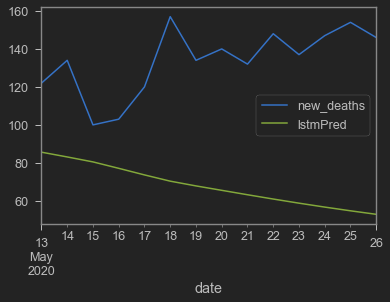

In [46]:
test.plot()

In [53]:
dfScaled = mmx.fit_transform(death)

In [54]:
dfGen = TimeseriesGenerator(data = dfScaled, targets = dfScaled, length = 7, batch_size = 1)

In [55]:
model = Sequential()
model.add(LSTM(units = 100, activation = 'relu', input_shape = (7,1)))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit_generator(dfGen, epochs = 8)

Epoch 1/8
140/140 [==============================] - 3s 19ms/step - loss: 0.0240
Epoch 2/8
140/140 [==============================] - 3s 22ms/step - loss: 0.0055: 2s - loss: 0
Epoch 3/8
140/140 [==============================] - 3s 20ms/step - loss: 0.0049
Epoch 4/8
140/140 [==============================] - 3s 20ms/step - loss: 0.0047
Epoch 5/8
140/140 [==============================] - 3s 20ms/step - loss: 0.0055
Epoch 6/8
140/140 [==============================] - 3s 20ms/step - loss: 0.0057: 0s - loss:
Epoch 7/8
140/140 [==============================] - 3s 20ms/step - loss: 0.0064
Epoch 8/8
140/140 [==============================] - 3s 19ms/step - loss: 0.0053


In [56]:
futurePred = []
firstEvalBatch = dfScaled[-7:]
currentBatch = firstEvalBatch.reshape((1,7,1))
for i in range(7):
    currentPred = model.predict(currentBatch)[0]
    futurePred.append(currentPred)
    currentBatch = np.append(currentBatch[:,1:,:], [[currentPred]], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
futurePred = mmx.inverse_transform(futurePred)

In [58]:
death.tail()

,new_deaths
date,
2020-05-22,148
2020-05-23,137
2020-05-24,147
2020-05-25,154
2020-05-26,146


In [59]:
futurePred = pd.DataFrame(futurePred, index = pd.date_range(start = '2020-06-28', periods = 7, freq = 'D'), columns = ['new_deaths'])

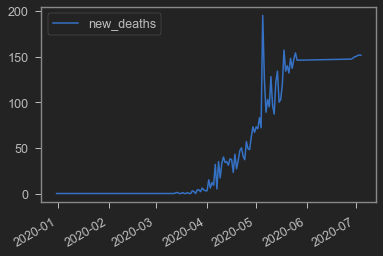

In [60]:
(pd.concat([death,futurePred], axis=0)).plot()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

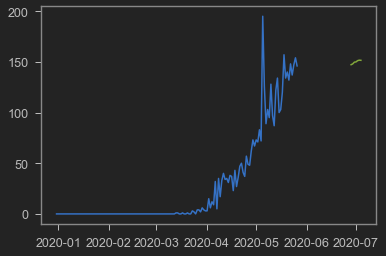

In [62]:
plt.plot(death.index, death.new_deaths)
plt.plot(futurePred.index, futurePred.new_deaths)

plt.plot(death.index, death.new_deaths)
plt.plot(futurePred.index, futurePred.new_deaths)
plt.xticks(rotation = 90)

In [63]:
futurePred.describe()

,new_deaths
count,7.000000
mean,149.895347
std,1.753165
min,147.195814
25%,148.857419
50%,149.944166
75%,151.369088
max,151.674433


In [64]:
twoWeekForecast = futurePred.reset_index()

In [65]:
twoWeekForecast

,index,new_deaths
0,2020-06-28,147.195814
1,2020-06-29,148.008755
2,2020-06-30,149.706083
3,2020-07-01,149.944166
4,2020-07-02,151.214747
5,2020-07-03,151.674433
6,2020-07-04,151.523429


In [77]:
twoWeekForecast

,index,new_deaths,totalDeaths
0,2020-06-28,147.195814,147.195814
1,2020-06-29,148.008755,295.204569
2,2020-06-30,149.706083,444.910651
3,2020-07-01,149.944166,594.854818
4,2020-07-02,151.214747,746.069565
5,2020-07-03,151.674433,897.743998
6,2020-07-04,151.523429,1049.267427
